# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [45]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [63]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [66]:
fraud['fraud'].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

In [67]:
fraud

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [68]:
# It is imbalanced

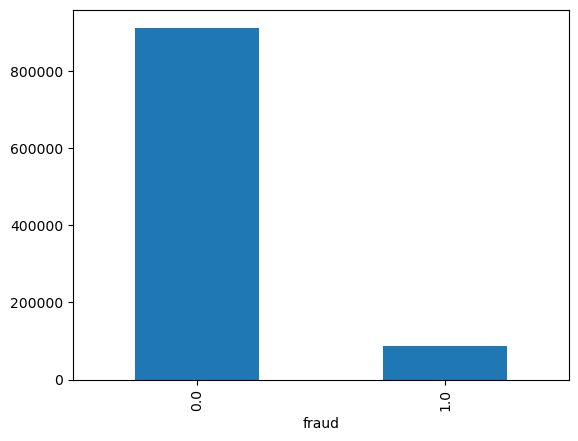

In [73]:
fraud_values = fraud["fraud"].value_counts()
fraud_values.plot(kind="bar")
plt.show()

In [75]:
features = fraud.drop(columns = ["fraud"])
target = fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [77]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
log_reg = LogisticRegression()

In [85]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [87]:
log_reg.score(X_test_scaled, y_test)

0.958848

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression

# Instantiate the model
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)
# Generate predictions
predictions = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, predictions)
print("Classification Report:")
print(class_report)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("ROC-AUC Score:", roc_auc)

In [ ]:
# Oversampled

In [166]:
fraud = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [168]:
fraud["fraud"] = y_train.values

In [170]:
fraud = train[train["fraud"] == 1]
no_fraud = train[train["fraud"] == 0]

In [172]:
fraud_oversampled = resample(fraud, 
                                    replace=True, 
                                    n_samples = len(no_fraud),
                                    random_state=0)

In [174]:
train_over = pd.concat([fraud_oversampled, no_fraud])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
497411,-0.379457,-0.063770,0.865567,-2.727751,1.362858,-0.334906,0.733318,1.0
486663,-0.248797,-0.196377,1.072128,0.366602,-0.733752,-0.334906,0.733318,1.0
523633,2.504378,0.078404,-0.589029,0.366602,-0.733752,-0.334906,0.733318,1.0
242005,1.292336,-0.215586,-0.613149,0.366602,-0.733752,-0.334906,0.733318,1.0
479734,1.009879,0.347920,1.630074,0.366602,1.362858,-0.334906,0.733318,1.0
...,...,...,...,...,...,...,...,...
749994,-0.271304,-0.208484,-0.374619,0.366602,-0.733752,-0.334906,0.733318,0.0
749995,-0.031413,-0.180884,0.003855,0.366602,-0.733752,-0.334906,0.733318,0.0
749996,-0.353614,-0.191219,-0.567566,0.366602,-0.733752,-0.334906,0.733318,0.0
749998,-0.362189,0.145233,-0.411778,0.366602,-0.733752,-0.334906,0.733318,0.0


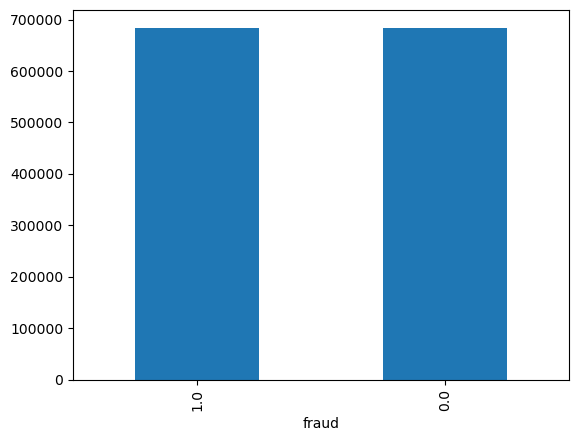

In [176]:
fraud_plt = train_over["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [178]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

In [180]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [184]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

/Users/peterwilliams/Anaconda3/anaconda3/lib/python3.12/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228142
         1.0       0.57      0.95      0.71     21858

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [190]:
#Undersampled

In [181]:
no_fraud_undersampled = resample(no_fraud, 
                                    replace=False, 
                                    n_samples = len(fraud),
                                    random_state=0)
no_fraud_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
599872,0.557032,-0.181282,-0.534772,0.366602,1.362858,-0.334906,-1.363665,0.0
113452,-0.319045,0.875800,-0.360927,0.366602,-0.733752,-0.334906,0.733318,0.0
399822,-0.052513,-0.168727,-0.393818,0.366602,1.362858,-0.334906,-1.363665,0.0
506320,-0.188947,-0.117482,-0.553521,0.366602,-0.733752,-0.334906,-1.363665,0.0
249149,-0.361801,-0.215489,-0.551409,0.366602,-0.733752,-0.334906,-1.363665,0.0
...,...,...,...,...,...,...,...,...
530043,0.028696,-0.210992,-0.580739,0.366602,-0.733752,2.985909,-1.363665,0.0
319624,0.052764,-0.070256,-0.537348,0.366602,1.362858,-0.334906,-1.363665,0.0
184373,-0.358415,-0.213357,-0.240279,0.366602,-0.733752,-0.334906,0.733318,0.0
635804,-0.141757,-0.184911,-0.045541,0.366602,-0.733752,-0.334906,-1.363665,0.0


In [216]:
no_fraud_undersampled = resample(no_fraud, 
                                    replace=False, 
                                    n_samples = len(fraud),
                                    random_state=0)
no_fraud_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
599872,0.557032,-0.181282,-0.534772,0.366602,1.362858,-0.334906,-1.363665,0.0
113452,-0.319045,0.875800,-0.360927,0.366602,-0.733752,-0.334906,0.733318,0.0
399822,-0.052513,-0.168727,-0.393818,0.366602,1.362858,-0.334906,-1.363665,0.0
506320,-0.188947,-0.117482,-0.553521,0.366602,-0.733752,-0.334906,-1.363665,0.0
249149,-0.361801,-0.215489,-0.551409,0.366602,-0.733752,-0.334906,-1.363665,0.0
...,...,...,...,...,...,...,...,...
530043,0.028696,-0.210992,-0.580739,0.366602,-0.733752,2.985909,-1.363665,0.0
319624,0.052764,-0.070256,-0.537348,0.366602,1.362858,-0.334906,-1.363665,0.0
184373,-0.358415,-0.213357,-0.240279,0.366602,-0.733752,-0.334906,0.733318,0.0
635804,-0.141757,-0.184911,-0.045541,0.366602,-0.733752,-0.334906,-1.363665,0.0


In [218]:
train_under = pd.concat([no_fraud_undersampled, fraud])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
599872,0.557032,-0.181282,-0.534772,0.366602,1.362858,-0.334906,-1.363665,0.0
113452,-0.319045,0.875800,-0.360927,0.366602,-0.733752,-0.334906,0.733318,0.0
399822,-0.052513,-0.168727,-0.393818,0.366602,1.362858,-0.334906,-1.363665,0.0
506320,-0.188947,-0.117482,-0.553521,0.366602,-0.733752,-0.334906,-1.363665,0.0
249149,-0.361801,-0.215489,-0.551409,0.366602,-0.733752,-0.334906,-1.363665,0.0
...,...,...,...,...,...,...,...,...
749929,-0.398318,-0.209213,4.715708,-2.727751,1.362858,-0.334906,0.733318,1.0
749945,-0.165074,-0.210172,0.845348,0.366602,1.362858,-0.334906,0.733318,1.0
749962,-0.344992,0.407557,3.652250,0.366602,-0.733752,-0.334906,0.733318,1.0
749978,-0.141487,-0.050178,3.784941,0.366602,-0.733752,-0.334906,0.733318,1.0


In [220]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

In [222]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [224]:
pred_2 = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred_2, y_true = y_test_2))

/Users/peterwilliams/Anaconda3/anaconda3/lib/python3.12/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228142
         1.0       0.57      0.95      0.71     21858

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



# Smote

In [227]:
from imblearn.over_sampling import SMOTE

In [229]:
pip install scikit-learn==1.2.2

Note: you may need to restart the kernel to use updated packages.


In [230]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [231]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [234]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [235]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228142
         1.0       0.57      0.95      0.71     21858

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

